In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Merge 12 months of sales data into a single csv file

In [38]:
files =[file for file in os.listdir("/var/SalesData")]
for file in files:
    print(file)

Sales_July_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_May_2019.csv
Sales_March_2019.csv
all_data.csv
Sales_February_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv


In [39]:
path = "/var/SalesData"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])

all_data.shape

(560550, 6)

### convert it into dataset

In [40]:
all_data.to_csv('/var/SalesData/all_data.csv',index=False)

#### Data cleaning and formatting

In [41]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [43]:
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [44]:
all_data = all_data.dropna(how='all')
all_data.shape

(558915, 6)

#### What is the best month for sale?

In [45]:
'04/19/19 08:46'.split('/')[0]

'04'

In [46]:
def month(x):
    return x.split('/')[0]

#### add month col

In [47]:
all_data['Month']=all_data['Order Date'].apply(month)

<ipython-input-47-692ea08b5d43>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [49]:
all_data['Month'].unique()

array(['07', 'Order Date', '08', '11', '12', '09', '10', '04', '05', '06',
       '01', '02', '03'], dtype=object)

In [50]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

557850

In [51]:
all_data=all_data[~filter]

In [52]:
all_data.shape

(557850, 7)

In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07


In [54]:
all_data['Month']=all_data['Month'].astype(int)

<ipython-input-54-188a0bea4a2e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [56]:
all_data['Price Each']=all_data['Price Each'].astype(float)

<ipython-input-56-007037e59fbf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [58]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [59]:
all_data.groupby('Month')['sales'].sum()

Month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: sales, dtype: float64

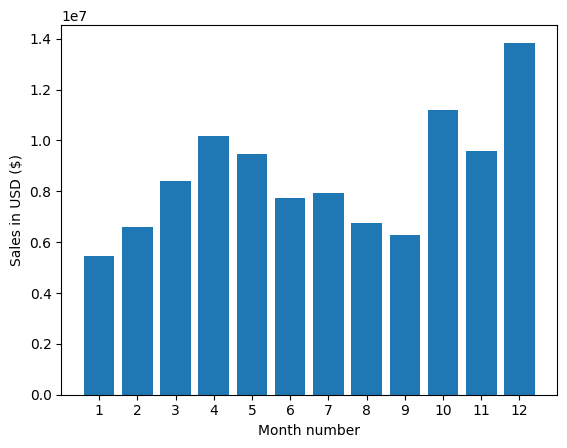

In [60]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Which city has max order

In [61]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [62]:
def city(x):
    return x.split(',')[1]

In [63]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [64]:
all_data.groupby('city')['city'].count()

city
 Atlanta           44643
 Austin            29715
 Boston            59802
 Dallas            44460
 Los Angeles       88815
 New York City     74628
 Portland          37395
 San Francisco    134196
 Seattle           44196
Name: city, dtype: int64

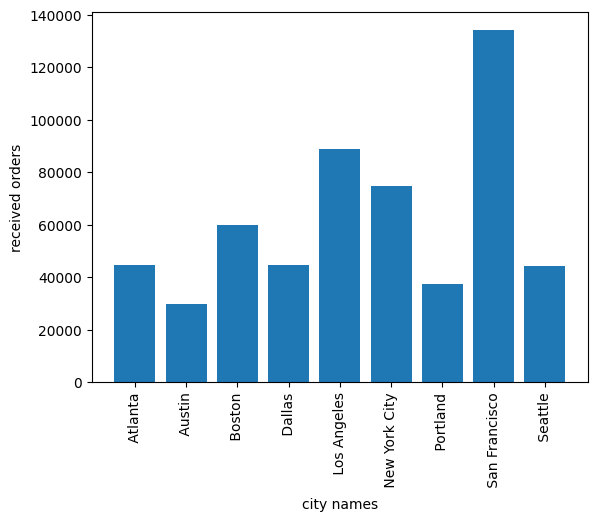

In [65]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

#### What time should we display advertisements to maximise for product purchase?

In [66]:
all_data['Order Date'][0].dtype

dtype('O')

In [67]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [68]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

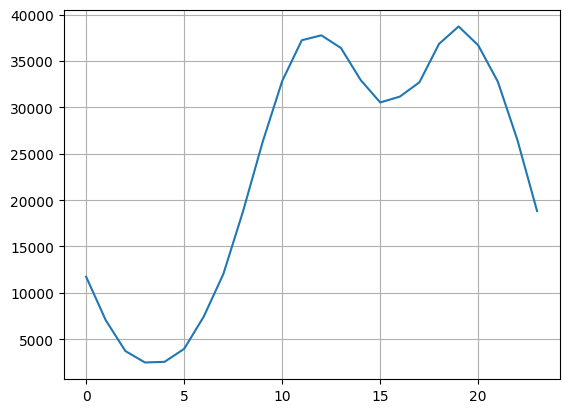

In [69]:
plt.grid()
plt.plot(keys,hour)

#### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

### What product sold the most? & Why?

<Axes: xlabel='Product'>

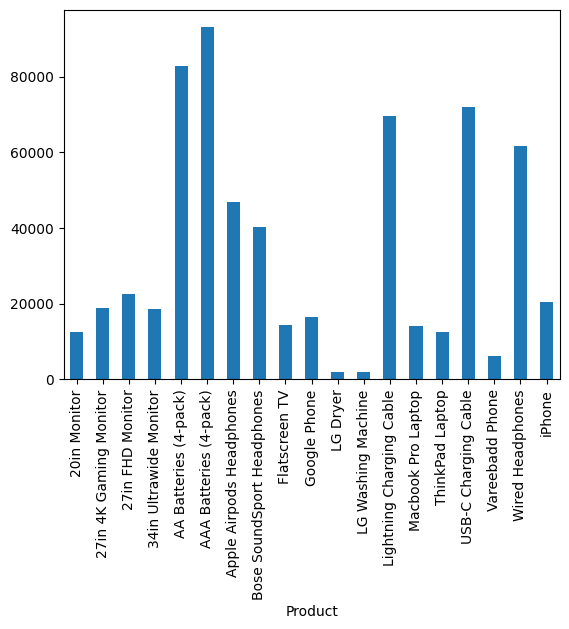

In [70]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [71]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [72]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-73-2f7dc3427216>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

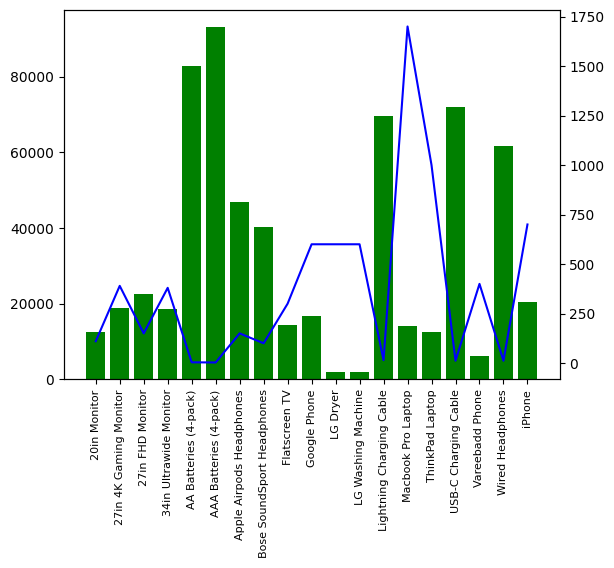

In [73]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

#### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa

In [74]:
all_data.shape

(557850, 10)

### What products are most often sold together?
note: keep orders that have same order Id,are sold mostly together

In [75]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,8
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,2
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7,99.99,San Francisco,18
6,222916,Google Phone,1,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7,600.00,New York City,22
7,222917,LG Dryer,1,600.00,07/17/19 13:44,"490 Adams St, New York City, NY 10001",7,600.00,New York City,13
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001",7,11.95,Los Angeles,21
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001",7,14.95,Dallas,13


In [76]:
#create grouped col
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16,"Apple Airpods Headphones,Apple Airpods Headpho..."
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,8,"Flatscreen TV,Flatscreen TV,Flatscreen TV"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,2,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."


In [78]:
df.shape

(557850, 11)

In [79]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='Grouped'>

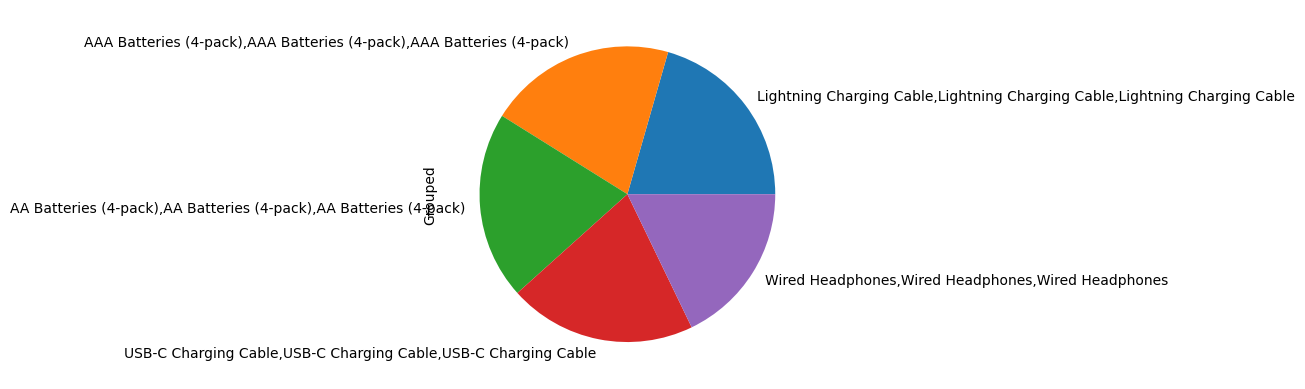

In [80]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [81]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [82]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [83]:
iplot([trace])